In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#Census Tract b25075 Housing value
#Census Tract B15003 Education level

 

In [5]:
#Taking census tract education data B15003 and merging them so it contains years 2019 - 2023 for Multnomah County
#Manually added years and cleaned csv's in excel. Did the same before with house value csv's.

def combine_csv_files(input_files, output_file):
    # Read and combine all CSV files
    combined_df = pd.concat([pd.read_csv(file) for file in input_files], ignore_index=True)
    
    # Save to output file
    combined_df.to_csv(output_file, index=False)
    print(f"Combined CSV saved as {output_file}")

education_csv_files = ["Multnomah_Education2019.csv","Multnomah_Education2020.csv",\
                  "Multnomah_Education2021.csv","Multnomah_Education2022.csv",\
                    "Multnomah_Education2023.csv"]

combine_csv_files(education_csv_files,"education_level_combined.csv")


Combined CSV saved as education_level_combined.csv


In [ ]:
# Load the two datasets
house_data = pd.read_csv("house_value_simplified.csv")
education_data = pd.read_csv("education_level_simplified.csv")

# Merge the two datasets on 'Census tract' and 'year' columns
merged_data = pd.merge(house_data, education_data, on=['Census Tract', 'Year'], how='inner')

# Save the merged dataset to a new CSV file
#merged_data.to_csv('merged_data.csv', index=False) # only needs to be done once

print(merged_data.head())

In [74]:
###########################################
# USED FOR CREATING AND CLEANING DATASETS #
###########################################
merged_data_p = pd.read_csv("merged_data_proportions.csv")

#Converting the dataframes types to floats except the first column
for col in merged_data_p.columns:
    if col != "Census Tract":
        merged_data_p[col] = pd.to_numeric(merged_data_p[col], errors="coerce").fillna(0).astype(float)

#merged_data_p.to_csv('merged_data_proportions_copy.csv', index=False) #Just for addign the dataset to folder !don't run again
#print(merged_data_p.head()) #Data validation test
#print(merged_data_p.dtypes)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# The 4 columns to exclude in scaling
exclude_cols = ["Census Tract", "Year", "Education Total", "House Total"]

# Select only columns to scale
cols_to_scale = merged_data_p.columns.difference(exclude_cols)

# Apply scaling
house_edu_scaled = merged_data_p.copy()
house_edu_scaled[cols_to_scale] = scaler.fit_transform(merged_data_p[cols_to_scale])

house_edu_scaled.to_csv('house_edu_norm.csv', index=False)

# Display sample
print(house_edu_scaled.head())

print(merged_data_p.drop(columns="Census Tract").groupby("Year").mean())


                                  Census Tract    Year  House Total  \
0     Census Tract 1, Multnomah County, Oregon  2019.0       1879.0   
1     Census Tract 2, Multnomah County, Oregon  2019.0       1325.0   
2  Census Tract 3.01, Multnomah County, Oregon  2019.0        847.0   
3  Census Tract 3.02, Multnomah County, Oregon  2019.0       2424.0   
4  Census Tract 4.01, Multnomah County, Oregon  2019.0       1135.0   

   Under 50K  50K-100K  100K-250K  250K-500K   500K-1M   1M-1.5M   1.5M-2M  \
0   0.000000  0.154977   0.059074   0.359766  0.480575  0.147347  0.042565   
1   0.000000  0.000000   0.009811   0.429434  0.549434  0.025903  0.000000   
2   0.000000  0.000000   0.024793   0.350649  0.604486  0.045925  0.000000   
3   0.000000  0.063466   0.014851   0.291254  0.642739  0.053805  0.000000   
4   0.019758  0.140385   0.035242   0.654626  0.277533  0.000000  0.000000   

        2M+  Education Total  No Formal Education  Elementary School  \
0  0.000000           5117.0    

<Figure size 1000x500 with 0 Axes>

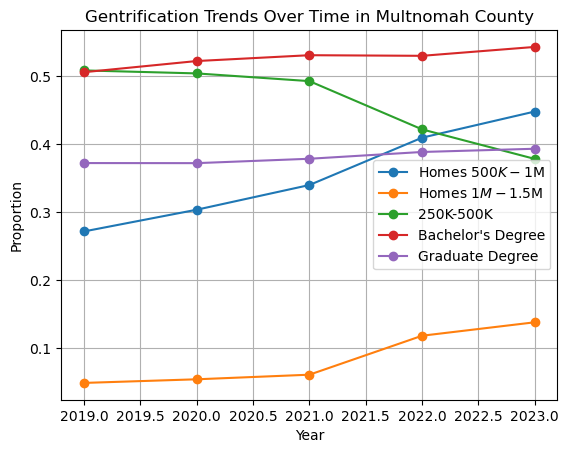

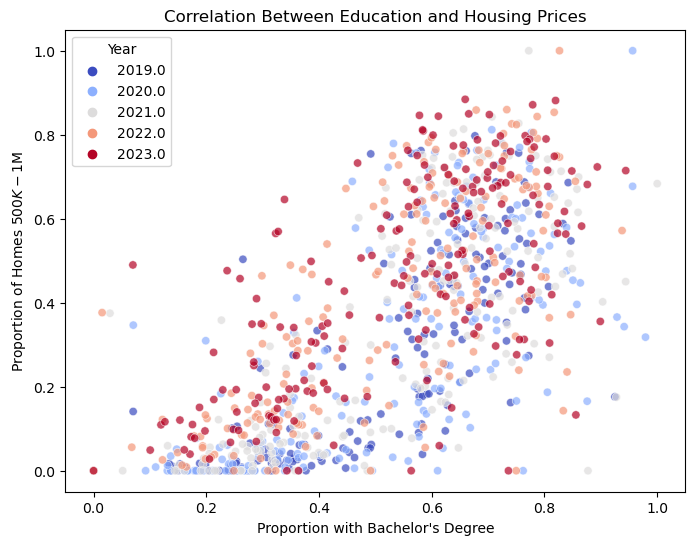

In [71]:

# === 1. Line Graph: Trends Over Time for Housing and Education ===
plt.figure(figsize=(10, 5))
house_edu_scaled.groupby("Year")[["500K-1M", "1M-1.5M","250K-500K", "Bachelor's degree", "Graduate Degree"]].mean().plot(marker="o")
plt.title("Gentrification Trends Over Time in Multnomah County")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.legend(["Homes $500K-$1M", "Homes $1M-$1.5M","250K-500K", "Bachelor's Degree", "Graduate Degree"])
plt.grid()
plt.show()

# === 2. Scatter Plot: Education Levels vs. Housing Values ===
plt.figure(figsize=(8, 6))
sns.scatterplot(data=house_edu_scaled, x="Bachelor's degree", y="500K-1M", hue=house_edu_scaled["Year"], palette="coolwarm", alpha=0.7)
plt.xlabel("Proportion with Bachelor's Degree")
plt.ylabel("Proportion of Homes $500K-$1M")
plt.title("Correlation Between Education and Housing Prices")
plt.show()